In [1]:
%load_ext autoreload
%autoreload 2

from heizlast import House, WeatherData

In [31]:
climate = WeatherData(nyears=5)

climate.load_data()

sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredict

In [32]:
climate.data.groupby(climate.data.index.year)['radiation'].sum()

date
2018     743.076108
2019    1199.784864
2020    1166.048832
2021    1077.072270
2022    1213.749870
2023     413.316396
Name: radiation, dtype: float64

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

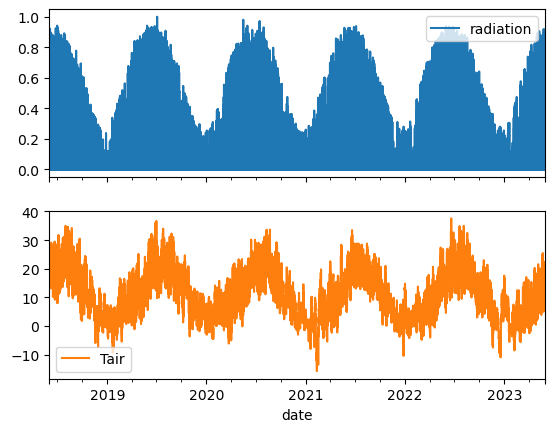

In [33]:
climate.data.plot(subplots=True)

In [61]:
# Haus erstellen und Wand hinzufügen
house = House(
    climate_data = climate.data
)
house.add_wall(
    name='Außenwand',
    area=2*(8.6+8.4)*2.70*2, 
    layers_info=[
        {'name': 'Innenputz aus Gipsputzmörtel', 'thickness': 0.02, 'thermal_conductivity': 0.7},
        {'name': 'Ziegel', 'thickness': 0.38, 'thermal_conductivity': 0.6},
        #{'name': 'Dämmung', 'thickness': 0.10, 'thermal_conductivity': 0.06},
        {'name': 'Kunstharzputz', 'thickness': 0.02, 'thermal_conductivity': 0.7},
        ]
    )

house.add_roof(
    area=8.6*8.4*1.7, 
    layers_info=[
        {'name': 'Gipskartonplatte', 'thickness': 0.0125, 'thermal_conductivity': 0.25},
        {'name': 'Dampfbremse', 'thickness': 0.005, 'thermal_conductivity': 0.22},
        {'name': 'Zellulose-Dämmung', 'thickness': 0.22, 'thermal_conductivity': 0.04},
        #{'name': 'Holzfaserdämmplatte', 'thickness': 0.035, 'thermal_conductivity': 0.044},
        #{'name': 'Luftschicht', 'thickness': 0.024, 'is_air': True},
        {'name': 'Dachsteine inkl. Lattung', 'thickness': 0.12, 'thermal_conductivity': 0.75},
        ]
)

house.add_buffer(capacity_liters=1000, initial_temp=20.0, min_temp=15.0, max_temp=80.0)

house.add_solar_heating_system(name='Solar', efficiency=0.7, module_power_wp=400, num_modules=3*5)
house.add_gas_heating_system(name='Gasheizung', efficiency=0.9, max_power=20)

house.run()

In [62]:
house.energy.head(50)

,energy_needed,buffer_energy,provided_energy,Solar,Gasheizung
time,,,,,
2018-06-01 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000
2018-06-01 01:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000
2018-06-01 02:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000
2018-06-01 03:00:00+00:00,0.000000,0.000000,0.011668,0.011668,0.000000
2018-06-01 04:00:00+00:00,0.000000,0.000000,0.198349,0.198349,0.000000
2018-06-01 05:00:00+00:00,0.000000,0.000000,0.746726,0.746726,0.000000
2018-06-01 06:00:00+00:00,0.000000,0.000000,1.260101,1.260101,0.000000
2018-06-01 07:00:00+00:00,0.000000,0.000000,0.840067,0.840067,0.000000
2018-06-01 08:00:00+00:00,0.000000,0.000000,2.555204,2.555204,0.000000


In [63]:
house.energy[['Solar', 'Gasheizung']].plot(subplots=True)

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

In [ ]:
house.energy[['Solar', 'Gasheizung']].sum()

Solar         17159.730986
Gasheizung    52559.564926
dtype: float64

<Axes: xlabel='date'>

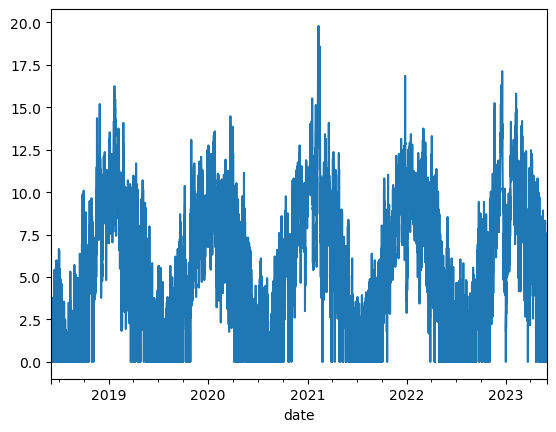

In [ ]:
house.transmission_heat_loss_ts['sum'].plot()